In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
from numpy import int64
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable

C:\Users\hgazmeh\AppData\Roaming\Python\Python310\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


### Fig S8

In [2]:
def exposed_pops(year):
    ejscreen = pd.read_csv('Allocation to Census tracts_v3/population_results/heatmaps/ejscreen_impacted_{}.csv'.format(year))
    if year > 2020 and year < 2060:
        ct_pop = pd.read_csv("Census tracts' Population/Census tracts' Population/CT_Population_2022-2060.csv")
        ct_pop['POP'] = ct_pop[f'{year}']
    elif year < 2010:
        ct_pop = pd.read_csv("Census tracts' Population/Census tracts' Population/CT_Population_1990-2009.csv")
        ct_pop['POP'] = ct_pop[f'{year}']
    else:
        ct_pop = pd.read_csv("Census tracts' Population/Census tracts' Population/CT_Population_{}.csv".format(year))
    ct_pop['GEOID'] = ct_pop['GEO_ID'].str[9:]
    ct_pop['GEOID'] = ct_pop['GEOID'].astype(int64)
    sample_pfas = ejscreen.merge(ct_pop, on='GEOID', how='left')

    for i in range(1, 10):
        sample_pfas[f'pfas_only_{i+1}'] = sample_pfas[f'pfas_within_{i+1}'] - sample_pfas[f'pfas_within_{i}']
    sample_pfas['pfas_only_1'] = sample_pfas['pfas_within_1']
    sample_pfas['less_than_2'] = sample_pfas['pfas_within_2']
    sample_pfas['less_than_2-5'] = sample_pfas['pfas_within_5'] - sample_pfas['pfas_within_2']
    sample_pfas['less_than_5-10'] = sample_pfas['pfas_within_10'] - sample_pfas['pfas_within_5']
    less_than_1_sum = sample_pfas[sample_pfas['less_than_2']>0]['POP'].sum()
    less_than_1_5_sum = sample_pfas[sample_pfas['less_than_2-5']>0]['POP'].sum()
    less_than_5_10_sum = sample_pfas[sample_pfas['less_than_5-10']>0]['POP'].sum()

    return less_than_1_sum, less_than_1_5_sum, less_than_5_10_sum

In [20]:
def exposed_pops_df(year):
    ejscreen = pd.read_csv('Allocation to Census tracts_v3/population_results/heatmaps/ejscreen_impacted_{}.csv'.format(year))
    if year > 2020 and year < 2060:
        ct_pop = pd.read_csv("Census tracts' Population/Census tracts' Population/CT_Population_2022-2060.csv")
        ct_pop['POP'] = ct_pop[f'{year}']
    elif year < 2010:
        ct_pop = pd.read_csv("Census tracts' Population/Census tracts' Population/CT_Population_1990-2009.csv")
        ct_pop['POP'] = ct_pop[f'{year}']
    else:
        ct_pop = pd.read_csv("Census tracts' Population/Census tracts' Population/CT_Population_{}.csv".format(year))
    ct_pop['GEOID'] = ct_pop['GEO_ID'].str[9:]
    ct_pop['GEOID'] = ct_pop['GEOID'].astype(int64)
    sample_pfas = ejscreen.merge(ct_pop, on='GEOID', how='left')

    return sample_pfas

In [3]:
less_than_2_sum_list = []
less_than_2_5_sum_list = []
less_than_5_10_sum_list = []

for year in [1990, 2000, 2010, 2020, 2030, 2040, 2050, 2060]:
    print(year)
    less_than_2_sum, less_than_2_5_sum, less_than_5_10_sum = exposed_pops(year)
    less_than_2_sum_list.append(less_than_2_sum)
    less_than_2_5_sum_list.append(less_than_2_5_sum)
    less_than_5_10_sum_list.append(less_than_5_10_sum)

1990
2000
2010
2020
2030
2040
2050
2060


In [4]:
df = pd.DataFrame({'year': [1990, 2000, 2010, 2020, 2030, 2040, 2050, 2060],
    'less_than_2_sum': less_than_2_sum_list,
    'less_than_2_5_sum': less_than_2_5_sum_list,
    'less_than_5_10_sum': less_than_5_10_sum_list})

df['less_than_2_sum'] = df['less_than_2_sum']/1000000
df['less_than_2_5_sum'] = df['less_than_2_5_sum']/1000000
df['less_than_5_10_sum'] = df['less_than_5_10_sum']/1000000

In [5]:
df

,year,less_than_2_sum,less_than_2_5_sum,less_than_5_10_sum
0,1990,0.389783,1.989405,5.888494
1,2000,0.335332,1.807808,5.325099
2,2010,0.315876,1.770090,5.271200
3,2020,0.421195,2.456679,6.820208
4,2030,0.452004,2.618702,7.263209
5,2040,0.468595,2.747097,7.628879
6,2050,0.485163,2.853296,7.895741
7,2060,0.501466,2.964396,8.197819


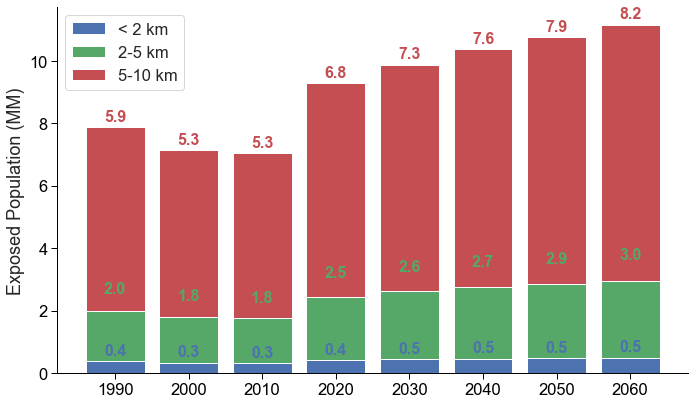

In [16]:
sns.set(style='white', font_scale=1.5)
fig, ax = plt.subplots(figsize=(10, 6))
barWidth = 8

bars1 = plt.bar(df['year'], df['less_than_2_sum'], color='b', edgecolor='white', width=barWidth, label='< 2 km')
bars2 = plt.bar(df['year'], df['less_than_2_5_sum'], bottom=df['less_than_2_sum'], color='g', edgecolor='white', width=barWidth, label='2-5 km')
bars3 = plt.bar(df['year'], df['less_than_5_10_sum'], bottom=df['less_than_2_5_sum'], color='r', edgecolor='white', width=barWidth, label='5-10 km')

for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}', 
                xy=(bar.get_x() + bar.get_width() / 2, height), 
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points", 
                ha='center', va='bottom', fontsize=16, color='b', fontweight='bold')
for bar in bars2:
    height = bar.get_height() + bar.get_y()
    ax.annotate(f'{bar.get_height():.1f}', 
                xy=(bar.get_x() + bar.get_width() / 2, height), 
                xytext=(0, 3),  
                textcoords="offset points", 
                ha='center', va='bottom', fontsize=16, color='g', fontweight='bold')
for bar in bars3:
    height = bar.get_height() + bar.get_y()
    ax.annotate(f'{bar.get_height():.1f}', 
                xy=(bar.get_x() + bar.get_width() / 2, height), 
                xytext=(0, 3),  
                textcoords="offset points", 
                ha='center', va='bottom', fontsize=16, color='r', fontweight='bold')
    
plt.xticks(df['year'])
plt.ylabel('Exposed Population (MM)')
plt.legend(loc='upper left')
# plt.xlabel('Year')

ax.set_facecolor('white')  # Set the background color to white
for spine in ax.spines.values():  # Set color and linewidth of the spines
    spine.set_color('black')
    spine.set_linewidth(1)
ax.tick_params(axis='x', colors='black', direction='out', length=6, width=1)
ax.tick_params(axis='y', colors='black', direction='out', length=6, width=1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.tight_layout()
# plt.savefig('exposure_trends_km.png', dpi=1500, bbox_inches='tight')
# plt.savefig('exposure_trends_km.pdf')

In [ ]:
def ejscreen_year_analysis(year):
    ejscreen = pd.read_csv('Allocation to Census tracts_v3/population_results/heatmaps/ejscreen_impacted_{}.csv'.format(year))
    # ejscreen['weighted_exposure'] = sum((1/(i+1)) * ejscreen[f'pfas_within_{i+1}'] for i in range(10))
    # ejscreen['weighted_exposure_log'] = np.log(ejscreen['weighted_exposure'] + 1)
    for i in range(1, 10):
        ejscreen[f'pfas_only_{i+1}'] = ejscreen[f'pfas_within_{i+1}'] - ejscreen[f'pfas_within_{i}']
    ejscreen['pfas_only_1'] = ejscreen['pfas_within_1']
    ejscreen['weighted_exposure'] = sum((1/(i+1)) * ejscreen[f'pfas_only_{i+1}'] for i in range(10))
    ejscreen['weighted_exposure_log'] = np.log(ejscreen['weighted_exposure'] + 1)
    return ejscreen

def ols_df_process(year):
    ejscreen_og = pd.read_csv('EJSCREEN/EJSCREEN_2023_Tracts_with_AS_CNMI_GU_VI_csv/EJSCREEN_2023_Tracts_with_AS_CNMI_GU_VI.csv')
    ejscreen = ejscreen_year_analysis(year)
    ols_df = ejscreen_og[['OID_', 'PEOPCOLORPCT', 'P_D2_PM25', 'P_D2_DSLPM', 'P_D2_PNPL', 'P_D2_PRMP', 'P_D2_PWDIS']].merge(ejscreen[['OID_', 'weighted_exposure'] + ['pfas_within_' + str(i+1) for i in range(10)]], on='OID_', how='left')
    for col in ['pfas_within_' + str(i+1) for i in range(10)] + ['weighted_exposure']:
        ols_df[col] = ols_df[col].fillna(0)
    ols_df['weighted_exposure_log'] = np.log(ols_df['weighted_exposure'] + 1)
    ols_df.dropna(inplace=True)
    ols_df.reset_index(drop=True, inplace=True)
    for col in ['P_D2_PM25', 'P_D2_DSLPM', 'P_D2_PNPL', 'P_D2_PRMP', 'P_D2_PWDIS']:
        ols_df[col] = ols_df[col]/100
    return ols_df

### Fig 2. Distribution of county-level carpet PFAS per capita in-use emissions under high estimate (status quo - 2020)

In [40]:
counties = gpd.read_file('assignment/tiger/counties/tl_2022_us_county/tl_2022_us_county.shp')
counties['GEOID'] = counties['GEOID'].astype(int)

pchigh = pd.read_csv('County level analysis/Data source/PC_InUseEmiss_High_StatusQuo.csv')
pchigh = counties[['GEOID', 'geometry']].merge(pchigh, left_on='GEOID', right_on='GeoID', how='inner')
pchigh['State'] = pchigh['County,State'].str.split(', ').str[1]

pchigh['2020_pct'] = pchigh['2020'].rank(pct=True)
pchigh['2020_1990_diff'] = pchigh['2020'] - pchigh['1990']

In [42]:
column_to_plot = '2020_pct'
cols_to_remove = ['geometry', 'GEOID', 'GeoID', 'StID', 'County,State', 'State', '2020_pct', '2020_1990_diff']

gdf = pchigh[~pchigh['State'].isin(['Hawaii', 'Alaska'])]
gdf_sub = gdf.drop(columns=cols_to_remove)

In [ ]:
import matplotlib.colors as mcolors
colormap = plt.cm.tab20  # Using the 'tab20' colormap which has 20 distinct colors

years = list(range(1990, 2061))

sns.set(style='white', font_scale=2)  # Set style and font size
fig, ax = plt.subplots(figsize=(10, 10)) 
# for index, row in gdf_sub.iterrows():
#     plt.plot(years, row, color='grey', linewidth=0.05)

highlighted = {
    1092: 'Coweta County, GA',
    1930: 'Cook County, MN',
    2671: 'Keweenaw County, MI'
}
highlight_colors = {
    1092: 'red',
    1930: 'blue',
    2671: 'green'
}
# Plot each row as a line
for index, row in gdf_sub.iterrows():
    if index in highlighted:
        if index == 2671:
            plt.plot(years, row, linewidth=2.5, label=highlighted[index], color=highlight_colors[index])
            plt.annotate(highlighted[index], xy=(years[-1], row.iloc[-1]), xytext=(years[-25], row.iloc[-1]-2),
                fontsize=16, color=highlight_colors[index])
        else:
            plt.plot(years, row, linewidth=2, label=highlighted[index], color=highlight_colors[index])
            plt.annotate(highlighted[index], xy=(years[-1], row.iloc[-1]), xytext=(years[-20], row.iloc[-1]),
                fontsize=16, color=highlight_colors[index])

    else:
        plt.plot(years, row, color='grey', linewidth=0.05)  # Regular lines

ax.set_facecolor('white')  # Set the background color to white
for spine in ax.spines.values():  # Set color and linewidth of the spines
    spine.set_color('black')
    spine.set_linewidth(1)
ax.tick_params(axis='x', colors='black', direction='out', length=6, width=1)
ax.tick_params(axis='y', colors='black', direction='out', length=6, width=1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Set labels and title
# plt.xlabel('Year')
plt.ylabel('per capita in-use emissions (mg/cap/year)')
# plt.title('Yearly Values for Each Row')
# plt.grid(True, which='both')
plt.xlim([1990, 2060])

# Show the plot
plt.show()

C:\Users\hgazmeh\AppData\Local\Temp\3\ipykernel_11780\252532958.py:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


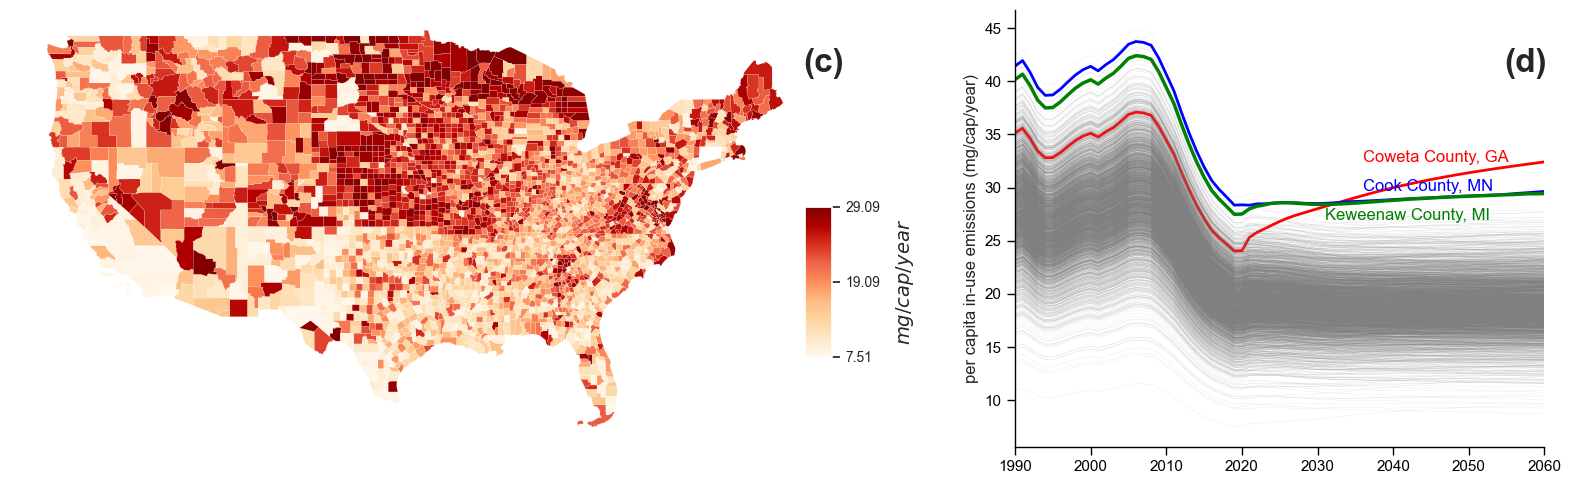

In [121]:
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec

colormap = plt.cm.tab20  # Using the 'tab20' colormap which has 20 distinct colors
years = list(range(1990, 2061))

fig = plt.figure(figsize=(18, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[2.8, 1.2])

ax0 = plt.subplot(gs[0])
gdf.plot(column=column_to_plot, ax=ax0, cmap='OrRd', edgecolor='white', linewidth=0.1)
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=gdf[column_to_plot].min(), vmax=gdf[column_to_plot].max()))
sm._A = []  # Dummy array for the ScalarMappable
cax = fig.add_axes([0.57, 0.27, 0.015, 0.3])  # [left, bottom, width, height]
cbar = fig.colorbar(sm, ax=ax0, fraction=0.03, pad=0.004, shrink=0.25, aspect=10, orientation='vertical', cax=cax)
percentiles = [0, 0.5, 1]  # Min, median, max percentiles
actual_values = np.percentile(gdf['2020'], [p * 100 for p in percentiles])
cbar.set_ticks(percentiles)
cbar.set_ticklabels([f"{val:.2f}" for val in actual_values])
cbar.ax.tick_params(labelsize=10)
cbar.outline.set_edgecolor('white')
cbar.set_label(r'$mg/cap/year$', fontsize=14, labelpad=10)
ax0.set_axis_off()

sns.set(style='white', font_scale=1)  # Set style and font size
ax1 = plt.subplot(gs[1])
for index, row in gdf_sub.iterrows():
    if index in highlighted:
        if index == 2671:
            ax1.plot(years, row, linewidth=2.5, label=highlighted[index], color=highlight_colors[index])
            ax1.annotate(highlighted[index], xy=(years[-1], row.iloc[-1]), xytext=(years[-30], row.iloc[-1]-2.5),
                fontsize=12, color=highlight_colors[index])
        else:
            ax1.plot(years, row, linewidth=2, label=highlighted[index], color=highlight_colors[index])
            ax1.annotate(highlighted[index], xy=(years[-1], row.iloc[-1]), xytext=(years[-25], row.iloc[-1]),
                fontsize=12, color=highlight_colors[index])
    else:
        ax1.plot(years, row, color='grey', linewidth=0.05)  # Regular lines
ax1.set_facecolor('white')  # Set the background color to white
for spine in ax1.spines.values():  # Set color and linewidth of the spines
    spine.set_color('black')
    spine.set_linewidth(1)
ax1.tick_params(axis='x', colors='black', direction='out', length=6, width=1)
ax1.tick_params(axis='y', colors='black', direction='out', length=6, width=1)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')
ax1.set_ylabel('per capita in-use emissions (mg/cap/year)')
ax1.set_xlim([1990, 2060])

fig.text(0.58, 0.84, '(c)', ha='center', fontsize=24, fontweight='bold')
fig.text(0.97, 0.84, '(d)', ha='center', fontsize=24, fontweight='bold')

plt.tight_layout()
# plt.savefig('inuse_high_percapita.png', dpi=1500, bbox_inches='tight')
# plt.savefig('inuse_high_percapita.pdf')

### in use stock emission

In [122]:
stock_high = pd.read_csv('County level analysis/Data source/InUseStock_High_StatusQuo.csv')
stock_high = counties[['GEOID', 'geometry']].merge(stock_high, left_on='GEOID', right_on='GeoID', how='inner')
stock_high['State'] = stock_high['County,State'].str.split(', ').str[1]

stock_high['2020_pct'] = stock_high['2020'].rank(pct=True)

column_to_plot = '2020_pct'
gdf = stock_high[~stock_high['State'].isin(['Hawaii', 'Alaska'])]

cols_to_remove = ['geometry', 'GEOID', 'GeoID', 'StID', 'County,State', 'State', '2020_pct']
gdf_sub = gdf.drop(columns=cols_to_remove)

C:\Users\hgazmeh\AppData\Local\Temp\3\ipykernel_11780\604615074.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


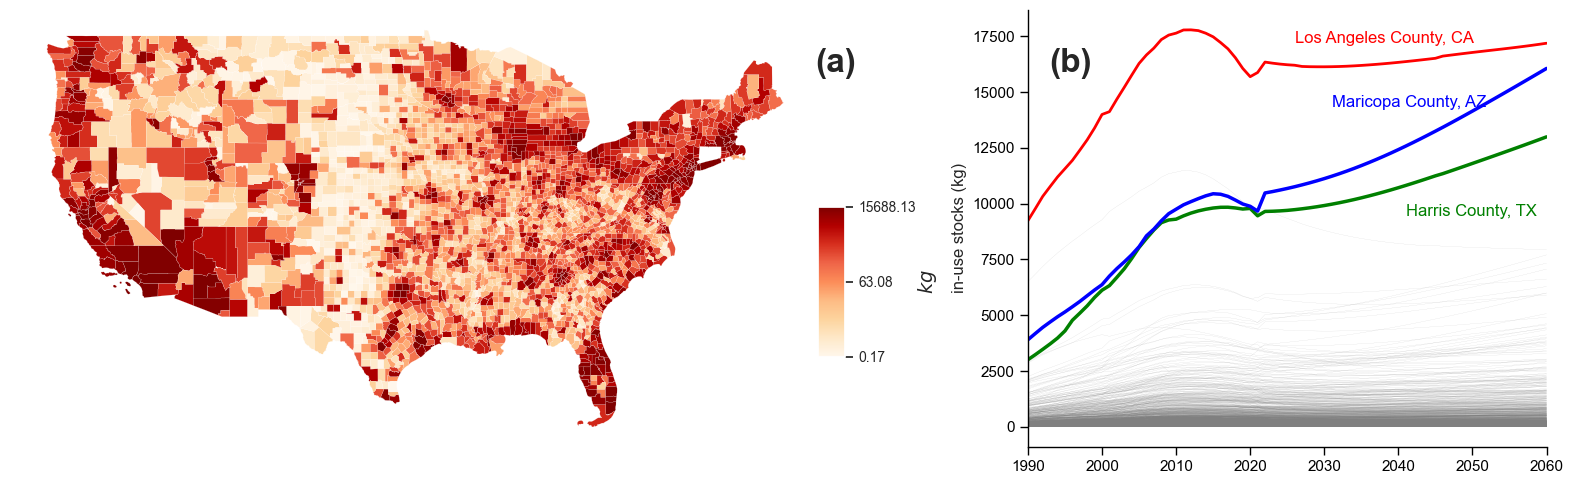

In [124]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(18, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[2.8, 1.2])

ax0 = plt.subplot(gs[0])
gdf.plot(column=column_to_plot, ax=ax0, cmap='OrRd', edgecolor='white', linewidth=0.1)
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=gdf[column_to_plot].min(), vmax=gdf[column_to_plot].max()))
sm._A = []  # Dummy array for the ScalarMappable
cax = fig.add_axes([0.57, 0.27, 0.015, 0.3])  # [left, bottom, width, height]
cbar = fig.colorbar(sm, ax=ax0, fraction=0.03, pad=0.004, shrink=0.25, aspect=10, orientation='vertical', cax=cax)
percentiles = [0, 0.5, 1]  # Min, median, max percentiles
actual_values = np.percentile(gdf['2020'], [p * 100 for p in percentiles])
cbar.set_ticks(percentiles)
cbar.set_ticklabels([f"{val:.2f}" for val in actual_values])
cbar.ax.tick_params(labelsize=10)
cbar.outline.set_edgecolor('white')
cbar.set_label(r'$kg$', fontsize=14, labelpad=0)
ax0.set_axis_off()

sns.set(style='white', font_scale=1)  # Set style and font size
ax1 = plt.subplot(gs[1])
for index, row in gdf_sub.iterrows():
    if index in highlighted:
        if index == 1280:
            ax1.plot(years, row, linewidth=2.5, label=highlighted[index], color=highlight_colors[index])
            ax1.annotate(highlighted[index], xy=(years[-1], row.iloc[-1]), xytext=(years[-30], row.iloc[-10]),
                fontsize=12, color=highlight_colors[index])
        elif index == 829:
            ax1.plot(years, row, linewidth=2.5, label=highlighted[index], color=highlight_colors[index])
            ax1.annotate(highlighted[index], xy=(years[-1], row.iloc[-1]), xytext=(years[-20], row.iloc[-50]),
                fontsize=12, color=highlight_colors[index])
        else:
            ax1.plot(years, row, linewidth=2, label=highlighted[index], color=highlight_colors[index])
            ax1.annotate(highlighted[index], xy=(years[-1], row.iloc[-1]), xytext=(years[-35], row.iloc[-1]),
                fontsize=12, color=highlight_colors[index])
    else:
        ax1.plot(years, row, color='grey', linewidth=0.05)  # Regular lines
ax1.set_facecolor('white')  # Set the background color to white
for spine in ax1.spines.values():  # Set color and linewidth of the spines
    spine.set_color('black')
    spine.set_linewidth(1)
ax1.tick_params(axis='x', colors='black', direction='out', length=6, width=1)
ax1.tick_params(axis='y', colors='black', direction='out', length=6, width=1)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')
ax1.set_ylabel('in-use stocks (kg)')
ax1.set_xlim([1990, 2060])
# make the yscale log
# ax1.set_yscale('log')

fig.text(0.58, 0.84, '(a)', ha='center', fontsize=24, fontweight='bold')
fig.text(0.71, 0.84, '(b)', ha='center', fontsize=24, fontweight='bold')

plt.tight_layout()
# plt.savefig('inuse_high_stock.png', dpi=1500, bbox_inches='tight')
# plt.savefig('inuse_high_stock.pdf')

### landfill accumulation status quo

In [46]:
landfill_accum = pd.read_csv('Landfill accum analysis/Data source/landfill_Accum_High_StatusQuo_WO_Leachate.csv')
landfill_accum = gpd.GeoDataFrame(landfill_accum, geometry=gpd.points_from_xy(landfill_accum['facility_x'], landfill_accum['facility_y']), crs='EPSG:4269')

cols_to_drop = ['facility_id', 'Address', 'facility_y', 'facility_x',
       'Year Landfill Opened', 'Landfill Closure Year', 'STATEFP', 'COUNTYFP',
       'GEOID', 'NAMELSAD']
landfill_accum_sub = landfill_accum.drop(columns=cols_to_drop)

In [47]:
states = gpd.read_file('assignment/tiger/2020/States/tl_2020_us_state/tl_2020_us_state.shp')
states = states[['NAME', 'STATEFP', 'geometry']]

landfills_gdf = gpd.sjoin(states, landfill_accum_sub, how='right')
landfills_gdf.drop_duplicates(inplace=True)
landfills_gdf = landfills_gdf[~landfills_gdf['NAME'].isin(['Hawaii', 'Alaska'])]
landfills_gdf['2020_pct'] = landfills_gdf['2020'].rank(pct=True)

ploting_states = landfills_gdf['NAME'].unique().tolist()
states_sub = states[states['NAME'].isin(ploting_states)]

In [48]:
landfill_accum_leachate = pd.read_csv('Landfill accum analysis/Data source/LFLeachate_High_StatusQuo.csv')
landfill_accum_leachate = gpd.GeoDataFrame(landfill_accum_leachate, geometry=gpd.points_from_xy(landfill_accum_leachate['facility_x'], landfill_accum_leachate['facility_y']), crs='EPSG:4269')
landfill_accum_leachate_sub = landfill_accum_leachate.drop(columns=cols_to_drop)

leachate_gdf = gpd.sjoin(states, landfill_accum_leachate_sub, how='right')
leachate_gdf.drop_duplicates(inplace=True)
leachate_gdf = leachate_gdf[~leachate_gdf['NAME'].isin(['Hawaii', 'Alaska'])]
leachate_gdf['2020_pct'] = leachate_gdf['2020'].rank(pct=True)

In [49]:
cols_to_remove = ['geometry', '2020_pct', 'index_left', 'NAME', 'STATEFP']
landfills_gdf_sub = landfills_gdf.drop(columns=cols_to_remove)
leachate_gdf_sub = leachate_gdf.drop(columns=cols_to_remove)

C:\Users\hgazmeh\AppData\Local\Temp\3\ipykernel_43152\1878189227.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


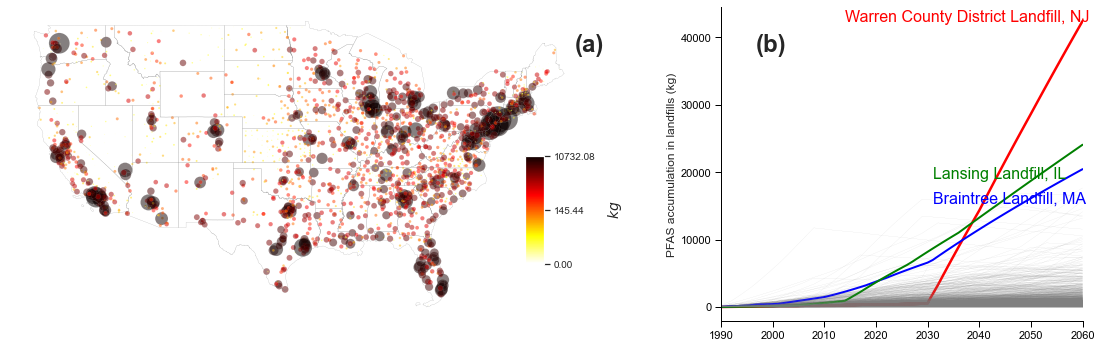

In [54]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(18, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[2.8, 1.2])

ax0 = plt.subplot(gs[0])
landfills_gdf.plot(column=column_to_plot, ax=ax0, cmap='hot_r', edgecolor='white', linewidth=0.1, markersize=landfills_gdf['2020']/15, alpha=0.5)
states_sub.boundary.plot(ax=ax0, color='grey', linewidth=0.15)
sm = plt.cm.ScalarMappable(cmap='hot_r', norm=plt.Normalize(vmin=landfills_gdf[column_to_plot].min(), vmax=landfills_gdf[column_to_plot].max()))
sm._A = []  # Dummy array for the ScalarMappable
cax = fig.add_axes([0.51, 0.25, 0.015, 0.3])  # [left, bottom, width, height]
cbar = fig.colorbar(sm, ax=ax0, fraction=0.03, pad=0.004, shrink=0.25, aspect=10, orientation='vertical', cax=cax)
percentiles = [0, 0.5, 1]  # Min, median, max percentiles
actual_values = np.percentile(landfills_gdf['2020'], [p * 100 for p in percentiles])
cbar.set_ticks(percentiles)
cbar.set_ticklabels([f"{val:.2f}" for val in actual_values])
cbar.ax.tick_params(labelsize=10)
cbar.outline.set_edgecolor('white')
cbar.set_label(r'$kg$', fontsize=14, labelpad=10)
ax0.set_axis_off()

highlighted = {
    701: 'Warren County District Landfill, NJ',
    1310: 'Braintree Landfill, MA',
    1325: 'Lansing Landfill, IL'
}
highlight_colors = {
    701: 'red',
    1310: 'blue',
    1325: 'green'
}

sns.set(style='white', font_scale=1)  # Set style and font size
ax1 = plt.subplot(gs[1])
for index, row in landfills_gdf_sub.iterrows():
    if index in highlighted:
        if index == 701:
            ax1.plot(years, row, linewidth=2.5, label=highlighted[index], color=highlight_colors[index])
            ax1.annotate(highlighted[index], xy=(years[-1], row.iloc[-1]), xytext=(years[-47], row.iloc[-1]-2),
                fontsize=16, color=highlight_colors[index])
        else:
            ax1.plot(years, row, linewidth=2, label=highlighted[index], color=highlight_colors[index])
            ax1.annotate(highlighted[index], xy=(years[-1], row.iloc[-1]), xytext=(years[-30], row.iloc[-1]-5000),
                fontsize=16, color=highlight_colors[index])
    else:
        ax1.plot(years, row, color='grey', linewidth=0.05)  # Regular lines
ax1.set_facecolor('white')  # Set the background color to white
for spine in ax1.spines.values():  # Set color and linewidth of the spines
    spine.set_color('black')
    spine.set_linewidth(1)
ax1.tick_params(axis='x', colors='black', direction='out', length=6, width=1)
ax1.tick_params(axis='y', colors='black', direction='out', length=6, width=1)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')
ax1.set_ylabel('PFAS accumulation in landfills (kg)')
ax1.set_xlim([1990, 2060])
# make the yscale log
# ax1.set_yscale('log')

fig.text(0.56, 0.84, '(a)', ha='center', fontsize=24, fontweight='bold')
fig.text(0.7, 0.84, '(b)', ha='center', fontsize=24, fontweight='bold')

plt.tight_layout()

C:\Users\hgazmeh\AppData\Local\Temp\3\ipykernel_43152\1970677159.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


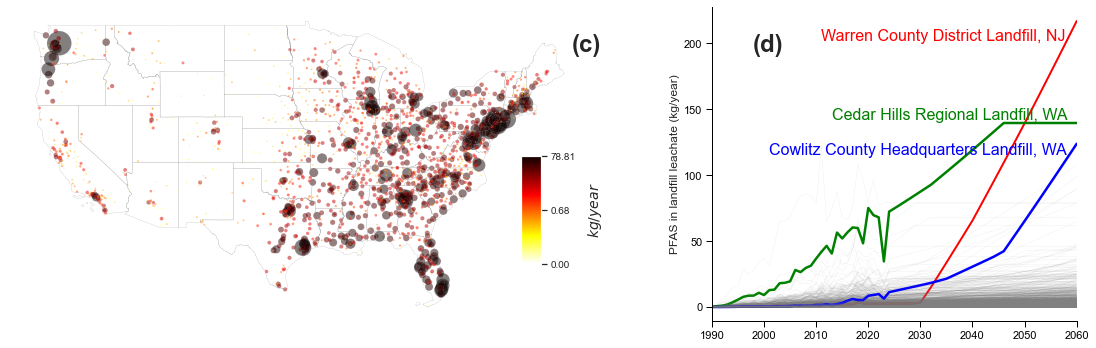

In [63]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(18, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[2.8, 1.2])

ax0 = plt.subplot(gs[0])
leachate_gdf.plot(column=column_to_plot, ax=ax0, cmap='hot_r', edgecolor='white', linewidth=0.1, markersize=leachate_gdf['2020']*8, alpha=0.5)
states_sub.boundary.plot(ax=ax0, color='grey', linewidth=0.15)
sm = plt.cm.ScalarMappable(cmap='hot_r', norm=plt.Normalize(vmin=leachate_gdf[column_to_plot].min(), vmax=leachate_gdf[column_to_plot].max()))
sm._A = []  # Dummy array for the ScalarMappable
cax = fig.add_axes([0.51, 0.25, 0.015, 0.3])  # [left, bottom, width, height]
cbar = fig.colorbar(sm, ax=ax0, fraction=0.03, pad=0.004, shrink=0.25, aspect=10, orientation='vertical', cax=cax)
percentiles = [0, 0.5, 1]  # Min, median, max percentiles
actual_values = np.percentile(leachate_gdf['2020'], [p * 100 for p in percentiles])
cbar.set_ticks(percentiles)
cbar.set_ticklabels([f"{val:.2f}" for val in actual_values])
cbar.ax.tick_params(labelsize=10)
cbar.outline.set_edgecolor('white')
cbar.set_label(r'$kg/year$', fontsize=14, labelpad=10)
ax0.set_axis_off()

highlighted = {
    701: 'Warren County District Landfill, NJ',
    1934: 'Cowlitz County Headquarters Landfill, WA',
    1138: 'Cedar Hills Regional Landfill, WA'
}
highlight_colors = {
    701: 'red',
    1934: 'blue',
    1138: 'green'
}

sns.set(style='white', font_scale=1)  # Set style and font size
ax1 = plt.subplot(gs[1])
for index, row in leachate_gdf_sub.iterrows():
    if index in highlighted:
        if index == 1138:
            ax1.plot(years, row, linewidth=2.5, label=highlighted[index], color=highlight_colors[index])
            ax1.annotate(highlighted[index], xy=(years[-1], row.iloc[-1]), xytext=(years[-48], row.iloc[-1]+3),
                fontsize=16, color=highlight_colors[index])
        elif index == 1934:
            ax1.plot(years, row, linewidth=2.5, label=highlighted[index], color=highlight_colors[index])
            ax1.annotate(highlighted[index], xy=(years[-1], row.iloc[-1]), xytext=(years[-60], row.iloc[-1]-8),
                fontsize=16, color=highlight_colors[index])
        else:
            ax1.plot(years, row, linewidth=2, label=highlighted[index], color=highlight_colors[index])
            ax1.annotate(highlighted[index], xy=(years[-1], row.iloc[-1]), xytext=(years[-50], row.iloc[-1]-15),
                fontsize=16, color=highlight_colors[index])
    else:
        ax1.plot(years, row, color='grey', linewidth=0.05)  # Regular lines
ax1.set_facecolor('white')  # Set the background color to white
for spine in ax1.spines.values():  # Set color and linewidth of the spines
    spine.set_color('black')
    spine.set_linewidth(1)
ax1.tick_params(axis='x', colors='black', direction='out', length=6, width=1)
ax1.tick_params(axis='y', colors='black', direction='out', length=6, width=1)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')
ax1.set_ylabel('PFAS in landfill leachate (kg/year)')
ax1.set_xlim([1990, 2060])
fig.text(0.56, 0.84, '(c)', ha='center', fontsize=24, fontweight='bold')
fig.text(0.7, 0.84, '(d)', ha='center', fontsize=24, fontweight='bold')

plt.tight_layout()